<a href="https://colab.research.google.com/github/Okesha2000/Data-analysis-with-python-and-pandas/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

In [134]:
transactions = pd.read_csv('/content/project_transactions.csv',
                           usecols = ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE']).astype({'DAY':'int16',  'QUANTITY' : 'int32', 'PRODUCT_ID':'int32'})

transactions


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60
...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99
2146307,1598,42305362535,711,114102,1,8.89
2146308,1598,42305362535,711,133449,1,6.99
2146309,1598,42305362535,711,6923644,1,4.50


In [135]:
# Use the following snippet to create a Date Column.

transactions = (
    transactions.assign(
        date = (pd.to_datetime("2016", format='%Y') + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

transactions

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01
...,...,...,...,...,...,...
2146306,1598,42305362535,92130,1,0.99,2017-12-11
2146307,1598,42305362535,114102,1,8.89,2017-12-11
2146308,1598,42305362535,133449,1,6.99,2017-12-11
2146309,1598,42305362535,6923644,1,4.50,2017-12-11


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

<ipython-input-129-79d979c914a6>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions.set_index('date').loc[:,'SALES_VALUE'].resample('M').sum().plot()


<Axes: xlabel='date'>

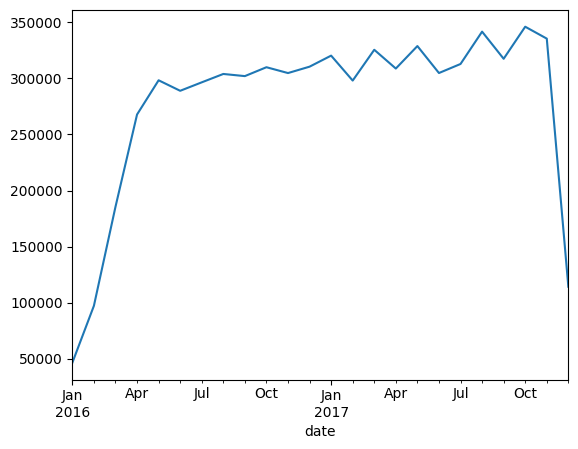

In [129]:
transactions.set_index('date').loc[:,'SALES_VALUE'].resample('M').sum().plot()

In [130]:

transactions.iloc[2142000:2146306]

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
2142000,2034,42276721656,938635,1,1.99,2017-12-10
2142001,2034,42276721656,995785,1,0.99,2017-12-10
2142002,2034,42276721656,1004906,1,2.48,2017-12-10
2142003,2034,42276721656,1044895,1,1.11,2017-12-10
2142004,2034,42276721656,1126899,2,5.78,2017-12-10
...,...,...,...,...,...,...
2146301,1598,42305362497,17904923,1,1.00,2017-12-11
2146302,1598,42305362535,45277,1,1.00,2017-12-11
2146303,1598,42305362535,46427,1,1.16,2017-12-11
2146304,1598,42305362535,50293,1,0.55,2017-12-11


<ipython-input-131-7153eeae0ad6>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions.loc['2016-04':'2017-10', 'SALES_VALUE'].resample('M').sum().plot()


<Axes: xlabel='date'>

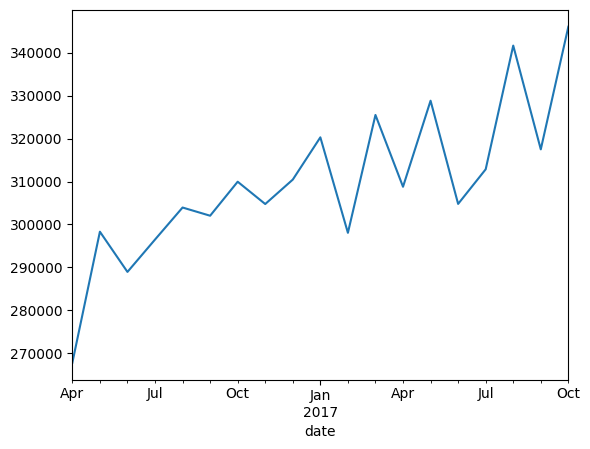

In [131]:
# Ensure the 'date' column is in datetime format
transactions['date'] = pd.to_datetime(transactions['date'])

# Set 'date' as the index and sort the DataFrame by date
transactions = transactions.set_index('date').sort_index()

# Slice by date and resample monthly
transactions.loc['2016-04':'2017-10', 'SALES_VALUE'].resample('M').sum().plot()

<ipython-input-132-8fbd2cd27bf8>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions.loc[:, ["SALES_VALUE"]].resample("M").sum().assign(


<Axes: xlabel='date'>

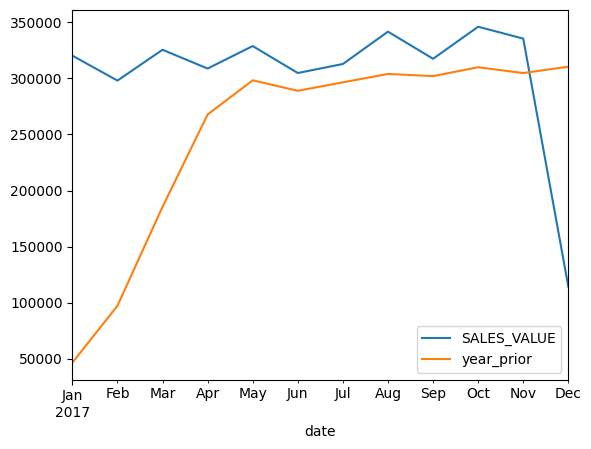

In [132]:
transactions.loc[:, ["SALES_VALUE"]].resample("M").sum().assign(
    year_prior = lambda x: x["SALES_VALUE"].shift(12)).loc["2017"].plot()

<Axes: xlabel='day_of_week'>

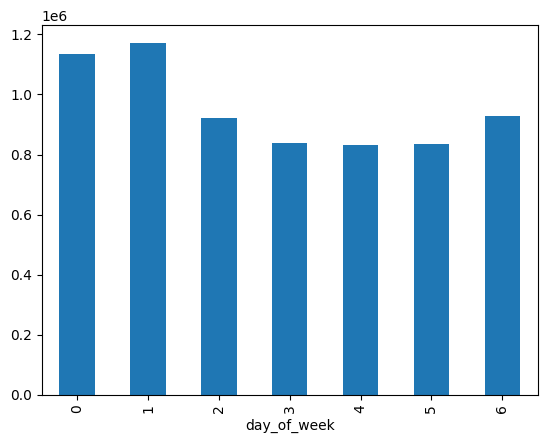

In [136]:
# Create a 'day_of_week' column: 0 = Monday, 1 = Tuesday, ..., 6 = Sunday
transactions['day_of_week'] = transactions['date'].dt.dayofweek

# Group by 'day_of_week' and sum 'SALES_VALUE'
sales_by_day = transactions.groupby('day_of_week')['SALES_VALUE'].sum()

# Sort the values in ascending order and plot
sales_by_day.plot.bar()



# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?

In [137]:
demo = pd.read_csv('/content/hh_demographic.csv',
                   usecols= ['AGE_DESC', 'INCOME_DESC', 'household_key', 'HH_COMP_DESC'],
                   dtype = {'AGE_DESC':'category',
                            'INCOME_DESC':'category',
                            'HH_COMP_DESC':'category'})

demo.head(3)

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8


In [138]:
trans_agg = transactions.groupby('household_key')['SALES_VALUE'].sum().reset_index()
trans_agg.head(3)

,household_key,SALES_VALUE
0,1,4330.16
1,2,1954.34
2,3,2653.21


In [139]:
trans_hh = demo.merge(trans_agg,
                      how = 'left',
                      on='household_key')

trans_hh.head(3)

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key,SALES_VALUE
0,65+,35-49K,2 Adults No Kids,1,4330.16
1,45-54,50-74K,2 Adults No Kids,7,3400.05
2,25-34,25-34K,2 Adults Kids,8,5534.97


<ipython-input-140-24b905e7c44c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trans_hh.groupby('AGE_DESC')['SALES_VALUE'].sum().plot.bar()


<Axes: xlabel='AGE_DESC'>

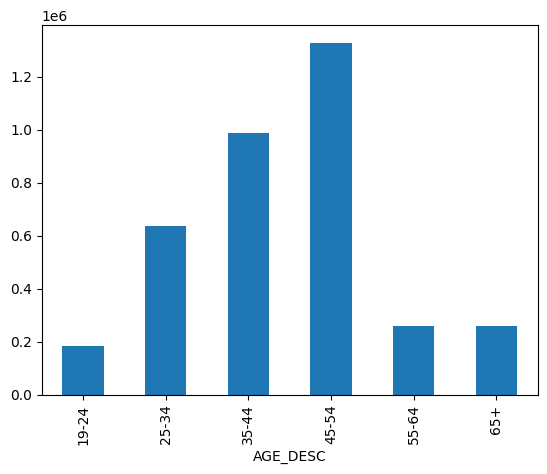

In [140]:
trans_hh.groupby('AGE_DESC')['SALES_VALUE'].sum().plot.bar()

<ipython-input-141-7df78c8c484a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trans_hh.groupby('INCOME_DESC')['SALES_VALUE'].sum().plot.bar()


<Axes: xlabel='INCOME_DESC'>

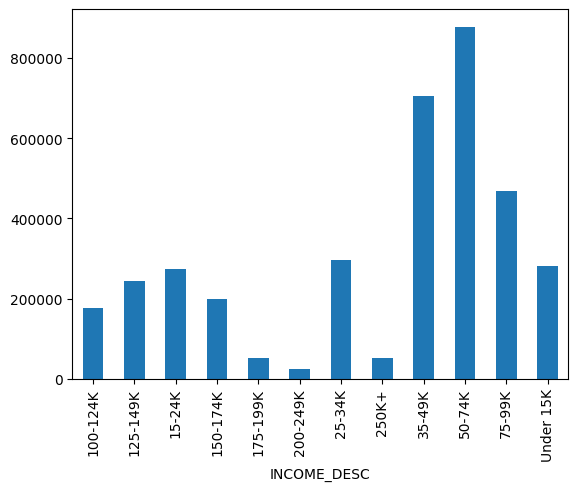

In [141]:
trans_hh.groupby('INCOME_DESC')['SALES_VALUE'].sum().plot.bar()

In [142]:
trans_hh.pivot_table(
    index = 'AGE_DESC',
    columns = 'HH_COMP_DESC',
    values = 'SALES_VALUE',
    aggfunc = 'mean'
).style.background_gradient(cmap = 'RdYlGn')

<ipython-input-142-ead8576fb3df>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  trans_hh.pivot_table(


HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?


In [143]:
products = pd.read_csv('/content/product.csv',
                       usecols = ['PRODUCT_ID', 'DEPARTMENT'],
                       dtype = {'PRODUCT_ID': 'int32',
                                 'DEPARTMENT':'category'})

products.head(3)

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY


In [144]:
tot = transactions.merge(demo,
                         how = 'inner',
                         on ='household_key')

tot = tot.merge(products,
                how = 'inner',
                on = 'PRODUCT_ID')

tot.head(3)

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,day_of_week,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,4,65+,100-124K,Single Female,GROCERY
1,1364,26984896261,897044,1,2.99,2016-01-01,4,65+,100-124K,Single Female,GROCERY
2,1364,26984896261,920955,1,3.09,2016-01-01,4,65+,100-124K,Single Female,MEAT


In [146]:
piv = tot.pivot_table(
    index = 'AGE_DESC',
    columns = 'DEPARTMENT',
    values = 'SALES_VALUE',
    aggfunc = 'sum'
).T.style.background_gradient(cmap = 'RdYlGn')

<ipython-input-146-c2cd8e4a5e9e>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tot.pivot_table(


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [147]:
piv.to_excel('piv.xlsx')